<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/GettingStartedWithGHZState_Qiskit_Amazon_Braket_mkbahk_20241025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]==1.0.2
!python3 -m pip install qiskit-braket-provider==0.4.1
#!python3 -m pip install amazon-braket-sdk
#!python3 -m pip install boto3
#!python3 -m pip install botocore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=39075a126f283afb044fe99f2ab5143712031ede83e88e31f170a60fbef6c8bb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [2]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [3]:
import os
# Set environment variables for AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = ""
os.environ['AWS_SECRET_ACCESS_KEY'] = ""
os.environ['AWS_DEFAULT_REGION'] = "us-east-1"

# You can optionally set the s3 bucket and prefix using environment variables
#os.environ['AWS_BRAKET_S3_BUCKET'] = "snuqc"
#os.environ['AWS_BRAKET_S3_PREFIX'] = "amazonbraket"

In [76]:
from qiskit_braket_provider import BraketLocalBackend, BraketProvider

provider = BraketProvider()
provider.backends(statuses=["ONLINE"], types=["QPU", "SIMULATOR"])
print(provider.backends())

[BraketBackend[Ankaa-2], BraketBackend[Aria 1], BraketBackend[Aria 2], BraketBackend[Forte 1], BraketBackend[Garnet], BraketBackend[SV1], BraketBackend[TN1], BraketBackend[dm1]]


In [107]:
#backend = BraketLocalBackend()
#backend = BraketLocalBackend('default') # State vector simulator
#backend = BraketLocalBackend('braket_ahs') # Analog Hamiltonian simulator - causing the error
#backend = BraketLocalBackend('braket_sv', experimental=True) # State vector simulator - causing the error
#backend = BraketLocalBackend('braket_sv') # State vector simulator
#backend = BraketLocalBackend('braket_dm')# Density matrix simulator

backend = provider.get_backend("Aria 1")
#backend = provider.get_backend("Aria 2")
#backend = provider.get_backend("Forte 1")

#backend = provider.get_backend("Ankaa-2")
#Rigetti_Aspen_M_3 = provider.get_backend("Aspen-M-3")

#backend = provider.get_backend("Garnet")

#backend = provider.get_backend("SV1")
#backend = provider.get_backend("dm1")
#backend = provider.get_backend("TN1")

backend

BraketBackend[Aria 1]

In [106]:
#experimental 기능을 enable하는 방법들
#backend = Aer.get_backend('statevector_simulator')
#backend.set_options(experimental=True)
#
#backend = provider.get_backend('simulator_statevector', experimental=True)
#
#result = backend.run(circuit, shots=1000, experimental=True)

NameError: name 'Aer' is not defined

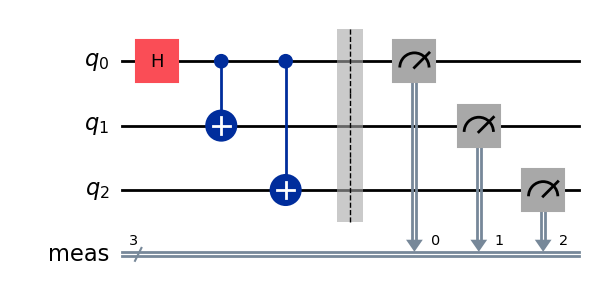

In [108]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure_all()
circuit.draw("mpl")

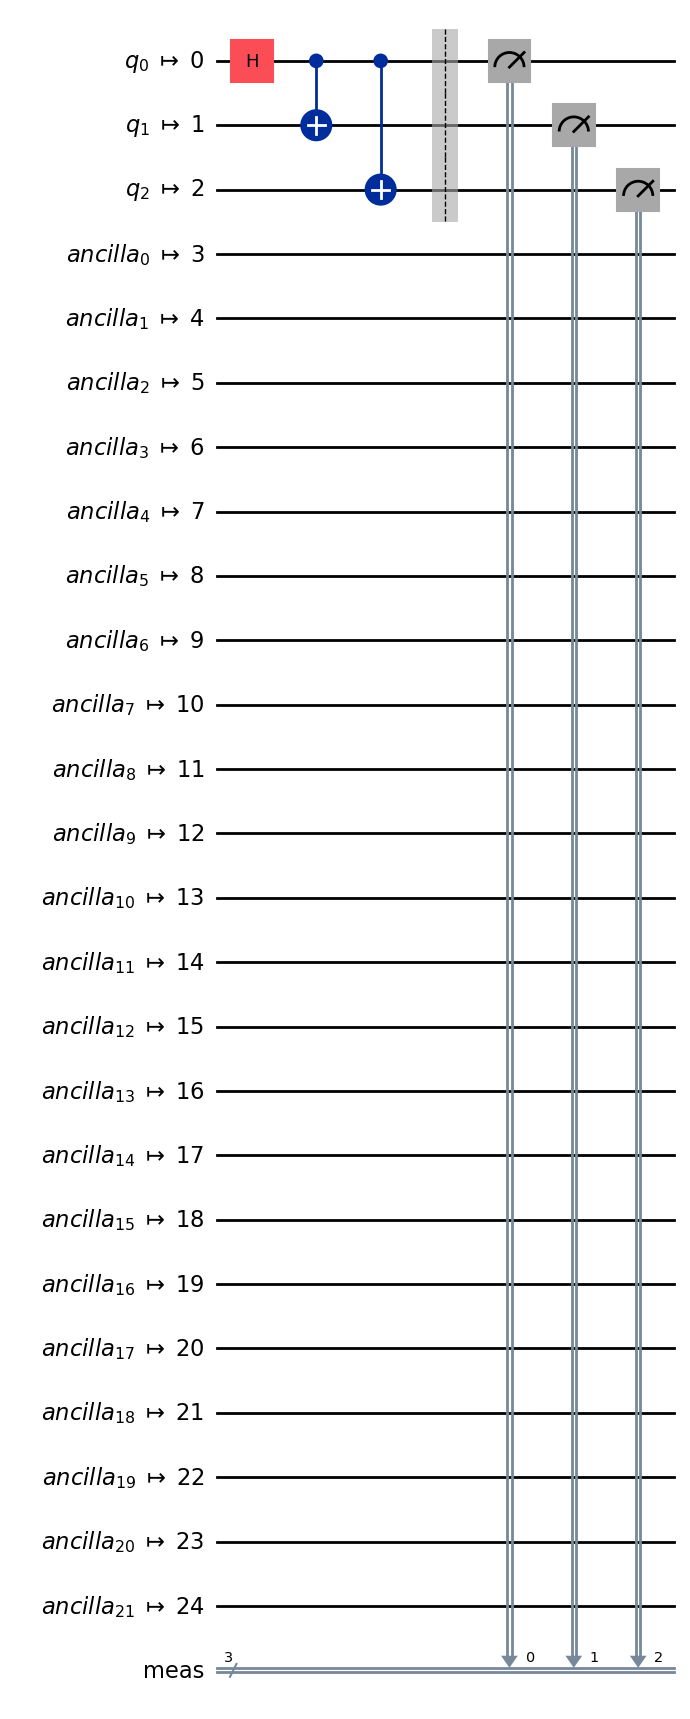

In [109]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend)
trans_qc.draw("mpl")

In [84]:
#from qiskit.providers.jobstatus import JobStatus
#import time

#job = backend.run(trans_qc, shots=1024)

#print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(2)
###while


#print("Job status is", job.status() )

# 결과 출력
#counts = job.result().get_counts()
#print(counts)

In [112]:
from qiskit.providers.jobstatus import JobStatus
#job = backend.run(trans_qc, shots=10, experimental=True)
job = backend.run(trans_qc, shots=10)

print(">>> Job ID :", job.job_id(),"\n")

>>> Job ID : arn:aws:braket:us-east-1:746669231099:quantum-task/01bfd956-b9e2-4c2b-a31f-1e1e0ac38185 



In [ ]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [131]:
print(job.status())

JobStatus.DONE


In [132]:
result = job.result()
result

Result(backend_name='BraketBackend[Aria 1]', backend_version='2', qobj_id='0', job_id='arn:aws:braket:us-east-1:746669231099:quantum-task/01bfd956-b9e2-4c2b-a31f-1e1e0ac38185', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'000': 6, '111': 4}, memory=['000', '000', '000', '000', '000', '000', '111', '111', '111', '111']), status=COMPLETED)], date=None, status=JobStatus.DONE, header=None)

In [133]:
counts = job.result().get_counts()
print(counts)

{'000': 6, '111': 4}


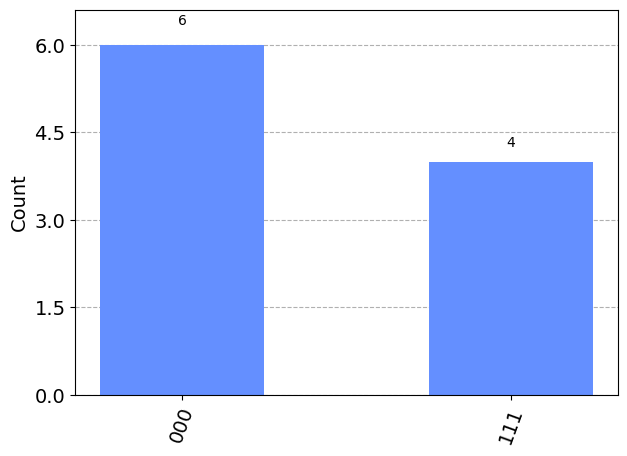

In [134]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

# 상태벡터 출력하기
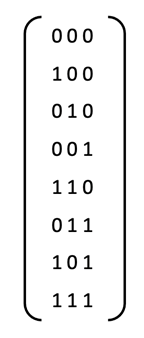


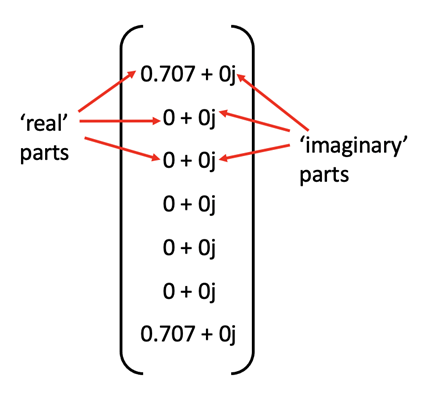

In [98]:
statevector = result.get_statevector()
statevector

QiskitError: 'No statevector for experiment "None"'

In [135]:
print("Quantum Task Summary\n")
print(t.quantum_tasks_statistics())
print('\nNote: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. \nEstimated charges shown may differ from your actual charges. \nEstimated charges do not factor in any discounts or credits, \nand you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"\nEstimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.2f} USD")

Quantum Task Summary

{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 1024, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(microseconds=4000), 'billed_execution_duration': datetime.timedelta(seconds=3)}, 'arn:aws:braket:::device/quantum-simulator/amazon/dm1': {'shots': 1024, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(microseconds=51000), 'billed_execution_duration': datetime.timedelta(seconds=3)}, 'arn:aws:braket:::device/quantum-simulator/amazon/tn1': {'shots': 1000, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(seconds=10, microseconds=569000), 'billed_execution_duration': datetime.timedelta(seconds=10, microseconds=569000)}, 'arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1': {'shots': 20, 'tasks': {'CREATED': 1, 'COMPLETED': 1}}}

Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. 
Estimated charges shown may differ from your actu